# **ML 05**  
**┗ 품질 중요인자 분석**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「품질 중요인자 탐색」
* 🥈Session 2 - 「선형회귀 활용 중요인자 도출」
* 🥇Session 3 - 「ML 활용 품질 중요인자 도출」

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/데이터분석/파이썬_실습/ML 실습/ML실습/ML실습/5_품질 중요인자 분석')
os.getcwd()

'/content/drive/MyDrive/데이터분석/파이썬_실습/ML 실습/ML실습/ML실습/5_품질 중요인자 분석'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🍷💰 (품질 관리자, 생산 관리자)

```
A공장에서는 Wine을 생산한다. 좋은 품질의 Wine은 높은 단가로 시장에 판매할 수 있다. A공장에서 생산하는 Wine은 1~9등급까지의 등급이 있고,  
7등급 이상이 가장 프리미엄 Wine이다. 7등급 이상의 Wine을 최대한 많이 생산해야 영업이익을 남길 수 있다. Wine 품질에 영향을 끼치는  
주요 공정변수를 확인하고, 공정 변수 관리를 통해 7등급 이상의 Wine을 생성하고자 한다.

```  

> **데이터 살펴보기**

* 생산된 와인의 품질(quality)과 품질 검사시 기록된 공정데이터 이다.
* 데이터 명세 ⬇

|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|pH|sulphates|alcohol|quality|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|산도|휘발선상|시트르산|잔당|염화물|독립 이산화황|총 이산화항|밀도|수소이온농도|황산염|도수|품질|

In [ ]:
import pandas as pd
df1=pd.read_csv('5_winequality_red.csv', sep=';')
df2=pd.read_csv('5_winequality_white.csv', sep=';')

df = pd.concat([df1,df2], axis = 0).reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 7등급 이상 프리미엄 Wine 생산량 부족
```  

> **기대효과**

```
▶ 7등급 이상 프리미엄 Wine 생산량 증가, 영업이익 증가
```

> **해결방안**

```
▶ Wine 품질에 영향을 미치는 인자 도출 및 공정 관리를 통한 프리미엄 Wine 생산
▶ Session 1 🥉
 - 품질 중요인자 탐색
▶ Session 2 🥈
 - 다중 회귀 분석을 통한 품질 예측
▶ Session 3 🥇
 - ML알고리즘 활용 품질 예측
```

> **성과측정**  

```
▶ 공정변수 Control 전/후 프리미엄 Wine 생산량 비교
```

> **현업적용**  

```
▶ Model을 통해 도출된 중요 공정 변수와 품질간의 상관관계 분석
▶ 해당 공정 변수 관리를 통해 프리미엄 Wine 생산
```

> **주요 코드 미리 살펴보기**  

```
▶ session 1 → np.where(), value_counts(), sns.heatmap()
▶ session 2 → LinearRegression(), mean_absolute_error, r2_score, mlr.coef_
▶ session 3 → lightgbm, classification_report, clf.feature_importance()
```

## **🥉Session 1**  
**┗ 품질 중요인자 탐색**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [ ]:
# ▶ Data 형태 확인
# ▶ 6497 row, 12 col로 구성됨
print('df', df.shape)

df (6497, 12)


In [ ]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
# ▶ Null 값 확인
#print(df.isnull().sum())

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# ▶ Outlier 확인, 음수값 확인
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# ▶ 8, 9등급의 Wine이 현저하게 적음
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
# ▶ 7등급 이상에 Wine을 프리미엄 Wine으로 정의하고 target data 생성
import numpy as np
df['target'] = np.where(df['quality']>6, 1, 0)
print(df.shape)
print('7등급이상', df[df['target']==1]['target'].count(), '개')
df.head(5)

(6497, 13)
7등급이상 1277 개


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
# ▶ 프리미엄 Wine을 예측하는 Classification 문제로 변경
 #참고로 타겟률이 낮으면 모델 예측이 잘 안됨
  #마케팅의 경우 2~3%의 타겟률을 통해 예측을 하려고 하지만, 타겟률이 너무 낮아서 어려움을 겪는 경우가 많음

print(round(df[df['target']==1]['target'].count()/df['target'].count()*100,2),'%')
print('')
df['target'].value_counts()

19.66 %



0    5220
1    1277
Name: target, dtype: int64

### · 품질 중요인자 탐색
---
* Data eda를 통해 중요인자 사전 탐색


In [ ]:
check = df.corr()['quality'] > 0.2
df.columns[check==True]

Index(['alcohol', 'quality', 'target'], dtype='object')

Index(['volatile acidity', 'chlorides', 'density', 'alcohol'], dtype='object')


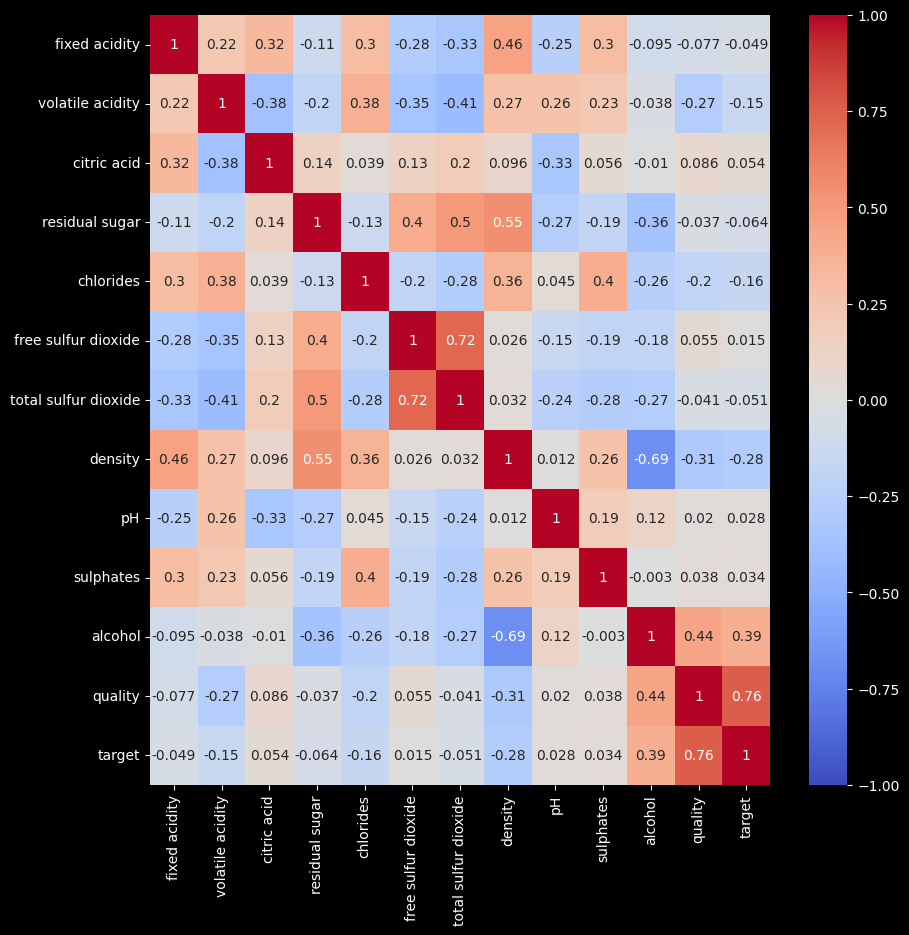

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(10, 10)

check = (abs(df.corr()['quality']) > 0.2) & ~df.columns.isin(['quality','target'])
print(df.columns[check==True])
plt.show()

In [ ]:
df['density'].max()

1.03898

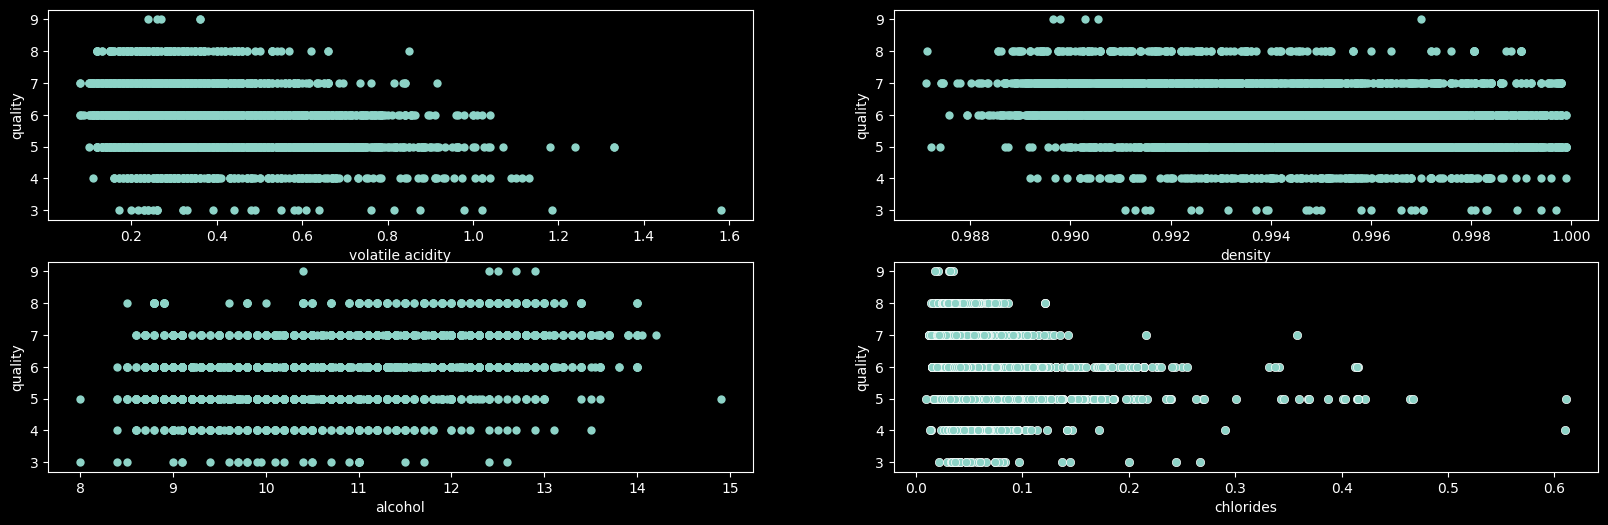

In [ ]:
# ▶ 상관계수 (0.2) 이상의 상관관계를 가지는 변수 집중 탐색
 #위에 표가 복잡해서 조건에 맞춰서 시각화
  #quality를 기준으로 상관계수가 높은 변수들을 활용
    #volatile acidity, density, alcohol

fig, axes = plt.subplots(2, 2)
sns.scatterplot(data = df, x='volatile acidity', y='quality', linewidth=0, ax=axes[0,0]);
sns.scatterplot(x=df[df['density']<1]['density'], y=df[df['density']<1]['quality'], linewidth=0, ax=axes[0,1]);
#sns.scatterplot(x=df['density'], y=df['quality'], linewidth=0, ax=axes[0,1]);
sns.scatterplot(x=df['alcohol'], y=df['quality'], linewidth=0, ax=axes[1,0]);
sns.scatterplot(x=df['chlorides'], y= df['quality'], ax = axes[1,1])
plt.gcf().set_size_inches(20, 6)


# ▶ 등급이 올라갈수록 volatile acidity(휘발선상)이 낮아지는 경향성이 보임 (음의 상관관계)
 #sns.scatterplot(x=df['dencity'], y=df['quality']로 하면 데이터가 너무 앞쪽에만 있어서 그래프로 보이가 어려워서 booiean index 진행
   #즉, df에서 dencity가 1보다 작은 애들 중에서 quality를 변수로 사용하고,

## **🥈Session 2**  
**┗ 선형회귀 활용 중요인자 도출**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [ ]:
# ▶ 모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.drop(['quality', 'target'], axis=1)
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 11)
(4547,)
(1950, 11)
(1950,)


### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가
* 선형회귀 실습에서는 사전에 정의한 Target을 사용하지 않고, 기존 Quality를 예측

In [ ]:
# ▶ LR(선형회귀) 모델 활용
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# ▶ 예측
# ▶ 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5734367909624533
r2_score(r2):  0.2910198829854087

mae_test(mae):  0.5591021413663292
r2_score(r2):  0.2897323681872084


In [ ]:
# ▶ 실제 값과 예측 값에 대해 표현
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,7,5.883967,1.116033
1,5,5.377525,-0.377525
2,6,5.781085,0.218915
3,6,5.843686,0.156314
4,3,5.623162,-2.623162


-47.21958108492683


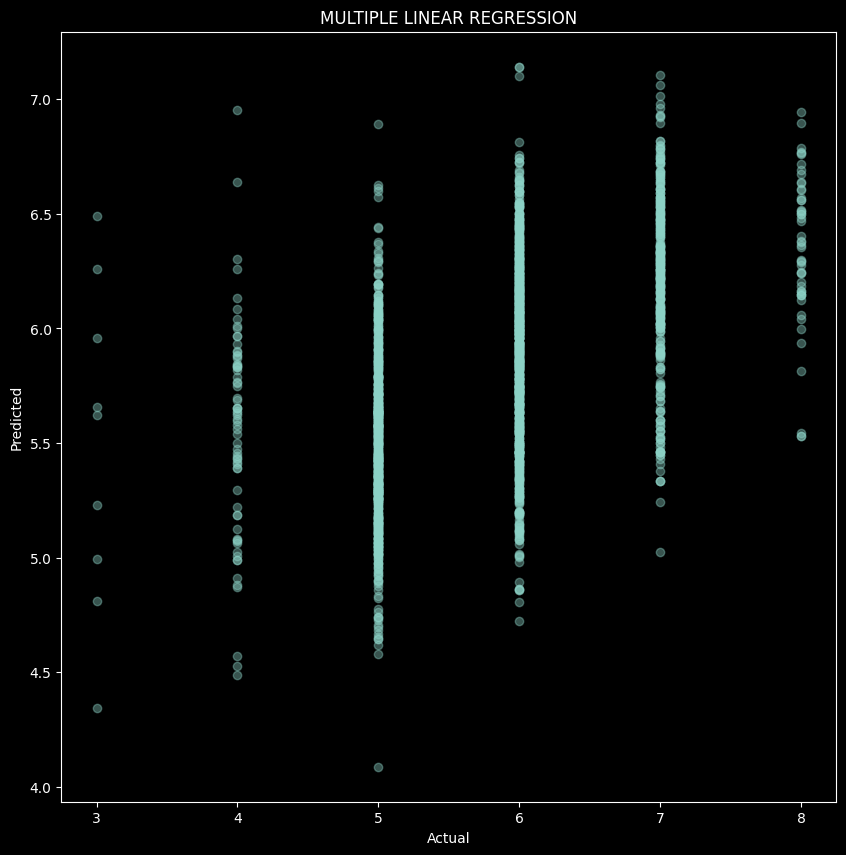

In [ ]:
# ▶ scatterplot을 통해 예측 모델이 얼마나 실제 문제를 잘 예측했는지 시각화
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test, alpha=0.4)         #alpha로 투명도 조절
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.gcf().set_size_inches(10, 10)

print(df_result['diff'].sum())
plt.show()

In [ ]:
# ▶ 실제 값과 예측 값에 대해 표현(정수값으로 변환)
 #위에서 예측값은 소수점이 있기 때문에 예측값도 실제값과 dtype을 동일하게 정수로 표현
  #round 활용

#round를 했을 때는 list로 묶어주면 오류가 덜남
 # y_pred_test가 ndarray형태이기 때문에 list(round(y_pred_test,0)) 으로 하면 안됨

df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':list(round(df_result['Predicted Values'],0))})
#df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':list(round(y_pred_test,0))})

df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
2931,7,6.0,1.0
218,5,5.0,0.0
1214,6,6.0,0.0
3783,6,6.0,0.0
2472,3,6.0,-3.0


In [ ]:
#mae로도 표현

abs(df_result['diff']).mean()

0.5138461538461538

In [ ]:
# ▶ 변형된 y 값에 대한 mae
pred_test = np.round(y_pred_test, 0).astype(int)
mae_test = mean_absolute_error(y_test, pred_test )
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test,np.round(y_pred_test, 0))
print('r2_score(r2): ', r2_test)

mae_test(mae):  0.5138461538461538
r2_score(r2):  0.15153895734811063


### · 다중 회귀 상관계수 확인
---
* 회귀식의 장점 : 계수(Coefficient)로 어느 정도 설명 가능하다.

In [ ]:
#mlr.coef_ 를 하면 회계계수가 나옴
 #Linear Regression 에서 활용
df_coef = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef

#density와 quality의 회귀 계수가 가장 큰 음의 상관 관계가 나오는 것을 알 수 있음

,col,coef
0,fixed acidity,0.073597
1,volatile acidity,-1.267682
2,citric acid,-0.017825
3,residual sugar,0.051739
4,chlorides,-0.534158
5,free sulfur dioxide,0.004579
6,total sulfur dioxide,-0.002549
7,density,-71.530083
8,pH,0.480634
9,sulphates,0.865983


In [ ]:
# ▶ 다중공선성 제거, 누구에 의해서 결과가 나왔는지 해석하기 어려움
 #과연 정말로 density가 -55만큼 상관관계가 있는지 파악하기 위해 다중공선성 제거 진행

# ▶ 분석 결과인 회귀 계수가 불안정하면, 회귀계수가 해당 변수의 종속변수에 미치는 영향력을 올바로 설명하지 못함
 #이를 해결하기 위해 '상관계수가 높은 변수들을 확인하고, 이들 중 하나의 변수를 제거하는 방법'으로 다중공선성 제거

df_corr = df.corr()
df_corr = df_corr[(abs(df_corr) > 0.5) & (df_corr != 1)]            #1은 자기 자신과의 관계이기 때문
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN,NaN,-0.686745,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ▶ (density, residual sugar) → 0.552517
# ▶ (total sulfur dioxide, free sulfur dioxide) → 0.720934
# ▶ (pH, alcohol) → 0.720934
    #즉, 관계가 높은 두 변수들 중 하나씩 제거해서 다중공선성 제거

from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)        #다중공선성을 제거
Y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


In [ ]:
# ▶ LR(선형회귀) 모델 활용
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# ▶ 예측
# ▶ 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
    #위에서 다중공선성을 제거하고 진행
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5741564870396219
r2_score(r2):  0.2727636335076832

mae_test(mae):  0.5819470499363207
r2_score(r2):  0.29097744201876075


In [ ]:
df_coef_2 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_2
# ▶ 다중공선성을 제거한 이후 Density(밀도)의 회귀계수가 변화함 ( 음-> 양 )

,col,coef
0,fixed acidity,-0.011690
1,volatile acidity,-1.451152
2,citric acid,-0.160449
3,chlorides,-0.515323
4,free sulfur dioxide,0.002963
5,density,36.060265
6,sulphates,0.494615
7,alcohol,0.376971


In [ ]:
# ▶ Data copy()
df_sc = df.copy()

In [ ]:
# ▶ 더 정확하게 하기 위해 scale 진행
 #minmax_scale 표준화
 #최솟값이 0, 최댓값이 1

from sklearn.preprocessing import minmax_scale

for i in list(df_sc.columns[0:11]) :
  df_sc[i] = minmax_scale(df_sc[i], axis=0, copy=True)

df_sc.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,0


In [ ]:
# 표준화 이후 다시 모델 학습

from sklearn.model_selection import train_test_split
from sklearn import metrics

X=df_sc.drop(['quality', 'target', 'residual sugar', 'total sulfur dioxide', 'pH'], axis=1)
Y=df_sc['quality']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4547, 8)
(4547,)
(1950, 8)
(1950,)


In [ ]:
# ▶ LR(선형회귀) 모델 활용
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# ▶ 예측 및 평가
# ▶ 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = mlr.predict(x_train)
y_pred_test = mlr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  0.5723608475615515
r2_score(r2):  0.280099541109338

mae_test(mae):  0.5843123534063099
r2_score(r2):  0.27263574277998115


In [ ]:
# ▶ Scaling을 통해 해석하기 쉬워짐
df_coef_3 = pd.DataFrame({'col':X.columns, 'coef':mlr.coef_}).reset_index(drop=True)
df_coef_3

#표준화 이후 density 보다 alcohol 값이 더 coef가 높게 나옴
 #alcohol이 중요 변수일 것을 예측할 수 있음

,col,coef
0,fixed acidity,-0.053118
1,volatile acidity,-2.271697
2,citric acid,-0.335191
3,chlorides,-0.603556
4,free sulfur dioxide,0.718729
5,density,1.750136
6,sulphates,0.861321
7,alcohol,2.584188


## **🥇Session 3**  
**┗ ML 활용 품질 중요인자 도출**  
---

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [ ]:
#프리미엄 와인을 예측하기 위한 작업 진행

# ▶ 모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split

# ▶ 데이터 세트로드
 #프리미엄 와인을 구분하기 위해 target 활용
X = df.drop(['quality', 'target'], axis=1)
Y = df['target']

# ▶train/test split
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.3)

# ▶데이터 세트를 적절한 LGB 형식으로 변환
 #LGB는 학습을 하기전에 lgb.Dataset으로 데이터를 lgb 형식으로 변환해야 함
d_train = lgb.Dataset (x_train, label = y_train)

### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [ ]:
#lgb 모델을 활용 준비
# ▶ setting the parameters
params = {}
params [ 'learning_rate'] = 0.02            #학습률 (0.05 이하로 지정, 점차 낮춰감)
params [ 'boosting_type'] = 'gbdt' # GradientBoostingDecisionTree   (거의 이대로 고정)
params ['objective'] = 'binary'     #목적설정, 이진 분류는 binary, multiclass는 multiclass
params [ 'metric' ] = 'binary_logloss' # metric for binary-class
params [ 'max_depth'] = 3
params [ 'num_leaves' ] = 6             #트리의 깊이 말고 잎사귀의 갯수, 즉 한 층에서 갯수
                                        #max_depth를 지수로 생각하고, 2의 max_depth 이하 만큼 지정
params ['seed'] = 23456
# ▶ 모델 학습
clf = lgb.train (params, d_train, 1000) # epocs에서 모델 훈련, 1000은 몇 번 트리를 만들 것인지 지정

In [ ]:
y_pred_train = clf.predict(x_train)
y_pred_train

#아래처럼 숫자가 다양하게 나옴
#쓰레쓰홀드가 자동적용이 안되어 있기 때문에 적용할 필요가 있음
 #randomforest 같은 경우에는 쓰레쓰홀드가 자동적용되어 있어서 0.5이상의 값들에 대해서는 자동으로 1로 지정
  #하지만 lgb는 수동으로 지정 필요

array([0.10367988, 0.4491771 , 0.42402002, ..., 0.28784659, 0.79531314,
       0.02527343])

In [ ]:
from sklearn.metrics import classification_report

#threshold 지정
#len(변수명) 을 통해 해당 변수의 갯수만큼 실행

y_pred_train = clf.predict(x_train)
for i in range(0,len(y_pred_train)):
    if y_pred_train[i]>=0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

y_pred_test = clf.predict(x_test)
for i in range(0,len(y_pred_test)):
    if y_pred_test[i]>=.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3656
           1       0.81      0.54      0.65       891

    accuracy                           0.88      4547
   macro avg       0.85      0.75      0.79      4547
weighted avg       0.88      0.88      0.88      4547

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1564
           1       0.65      0.39      0.49       386

    accuracy                           0.84      1950
   macro avg       0.76      0.67      0.70      1950
weighted avg       0.82      0.84      0.82      1950



### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

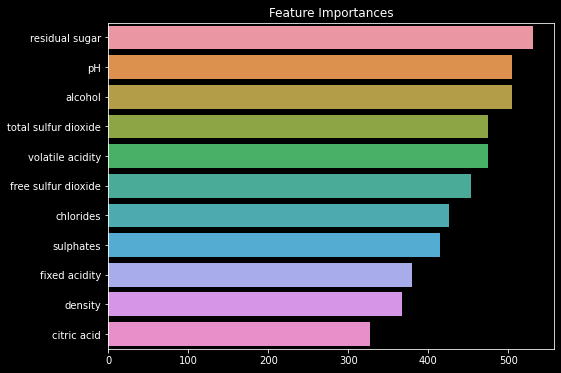

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = clf.feature_importance()                               #여기는 feature_importance() 로 함    _가 없음
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:21]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

#이렇게 중요변수를 파악하고 현업 담당자와 모델링 결과가 적합한지 이야기 해봐야 함

### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(clf)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)